### Import library



In [37]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
def load_audio(file_path):
    """Load audio file and return the audio signal and sample rate."""
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def calculate_wideband_spectrogram(audio, sr):
    """Calculate wideband spectrogram of the given audio signal."""
    window_size = int(5e-3 * sr)  # 5 ms window
    hop_length = int(2e-3 * sr)   # 2 ms hop
    D = librosa.stft(audio, n_fft=1024, hop_length=hop_length, win_length=window_size, window='hann')
    S_dB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    return S_dB, hop_length

def plot_waveform(audio, sr, speaker, vowel, idx, n_rows):
    """Plot the waveform of the audio signal."""
    plt.subplot(n_rows, 2, 2 * idx - 1)
    librosa.display.waveshow(audio, sr=sr, alpha=0.5)
    plt.title(f"Waveform for Vowel {speaker} /{vowel}/")

def plot_wideband_spectrogram(S_dB, sr, hop_length, speaker, vowel, idx, n_rows):
    """Plot the wideband spectrogram of the audio signal."""
    plt.subplot(n_rows, 2, 2 * idx)
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Wideband Spectrogram for Vowel {speaker} /{vowel}/")

def plot_vowel_waves_and_wideband_spectrograms(folder_name, speaker):
    """Plot the waveform and wideband spectrogram of the audio signal."""
    vowels = ['a', 'e', 'i', 'o', 'u']
    file_paths = {vowel: os.path.join(folder_name, f"{speaker}/{vowel}.wav") for vowel in vowels}
    n_rows = len(vowels)
    
    plt.figure(figsize=(10, 2 * n_rows))
    title = os.path.basename(folder_name) 
    plt.suptitle(title, fontsize=16) 

    for idx, (vowel, path) in enumerate(file_paths.items(), 1):
        audio, sr = load_audio(path)
        S_dB, hop_length = calculate_wideband_spectrogram(audio, sr)

        plot_waveform(audio, sr, speaker, vowel, idx, n_rows)
        plot_wideband_spectrogram(S_dB, sr, hop_length, speaker, vowel, idx, n_rows)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the suptitle
    plt.show()

def plot_vowel_waves_and_wideband_spectrograms_vowel(folder_name, speakers, vowel):
    """Plot the waveform and wideband spectrogram of the audio signal for a specific vowel."""
    file_paths = {f"{speaker}/{vowel}": os.path.join(folder_name, f"{speaker}/{vowel}.wav") for speaker in speakers}
    
    n_rows = len(speakers)
    plt.figure(figsize=(10, 2 * n_rows))
    title = os.path.basename(folder_name) 
    plt.suptitle(title, fontsize=16) 
    for idx, (speaker, path) in enumerate(file_paths.items(), 1):
        try:
            audio, sr = load_audio(path)
            S_dB, hop_length = calculate_wideband_spectrogram(audio, sr)
            speaker = speaker[:-2]
            plot_waveform(audio, sr, speaker, vowel, idx, n_rows)
            plot_wideband_spectrogram(S_dB, sr, hop_length, speaker, vowel, idx, n_rows)
        except Exception as e:
            print(f"Error processing {vowel} for speaker {speaker}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the suptitle
    plt.show()
    
def plot_wideband_spectrograms_vowel(folder_name, speakers, vowel):
    """Plot the wideband spectrogram of the audio signal for a specific vowel."""
    file_paths = {f"{speaker}/{vowel}": os.path.join(folder_name, f"{speaker}/{vowel}.wav") for speaker in speakers}
    
    n_rows = len(speakers)
    plt.figure(figsize=(10, 5 * n_rows))
    title = os.path.basename(folder_name) 
    plt.suptitle(title, fontsize=16) 
    for idx, (speaker, path) in enumerate(file_paths.items(), 1):
        try:
            audio, sr = load_audio(path)
            S_dB, hop_length = calculate_wideband_spectrogram(audio, sr)
            speaker = speaker[:-2]
            plt.subplot(n_rows, 1, idx)
            librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"Wideband Spectrogram for Vowel {speaker} /{vowel}/")
        except Exception as e:
            print(f"Error processing {vowel} for speaker {speaker}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the suptitle
    plt.show()

def plot_chart(filepath):
    df = pd.read_csv(filepath)
    print(df)
    vowels = list(df.columns)
    print(vowels)
    title = f"Bộ ba tần số formant của {os.path.basename(filepath).split('.')[0]}"
    colors = ['skyblue', 'salmon', 'lightgreen']
    bar_colors = [colors[i % len(colors)] for i in range(len(vowels))]
    bar_width = 1
    bar_name = ['F1', 'F2', 'F3']
    for index, row in df.iterrows():
        plt.figure(figsize=(8, 6))
        plt.title(title + f"({index + 1 if index < 3 else 'mean'})")
        bars = plt.bar(vowels, row, color=bar_colors, width=bar_width)
        for i in range(len(bars)):
            yval = bars[i].get_height()
            plt.text(bars[i].get_x() + bars[i].get_width()/2.0, yval, bar_name[i % 3], va='bottom', ha='center')
        plt.xlabel('Vowel')
        plt.ylabel('Hz')
        plt.xticks(range(len(vowels)), vowels, rotation=45)
        
        plt.legend()
    plt.show()

### Vowel waves and wideband spectrograms of 4 people

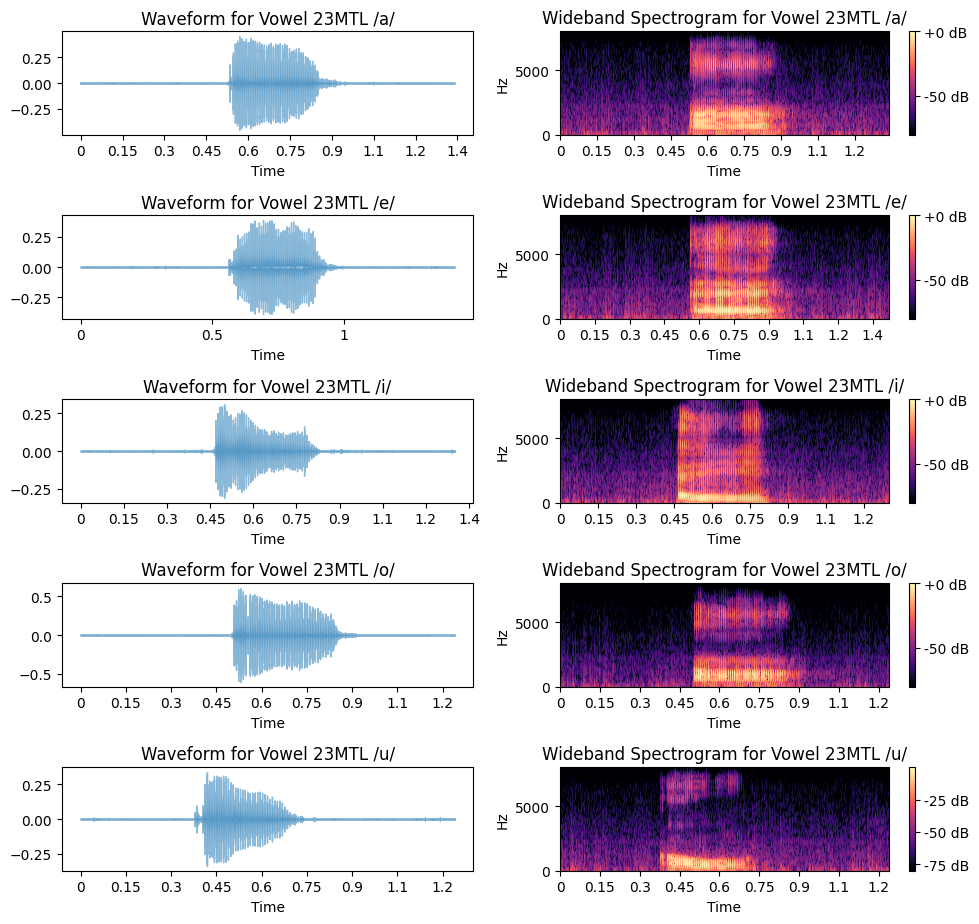

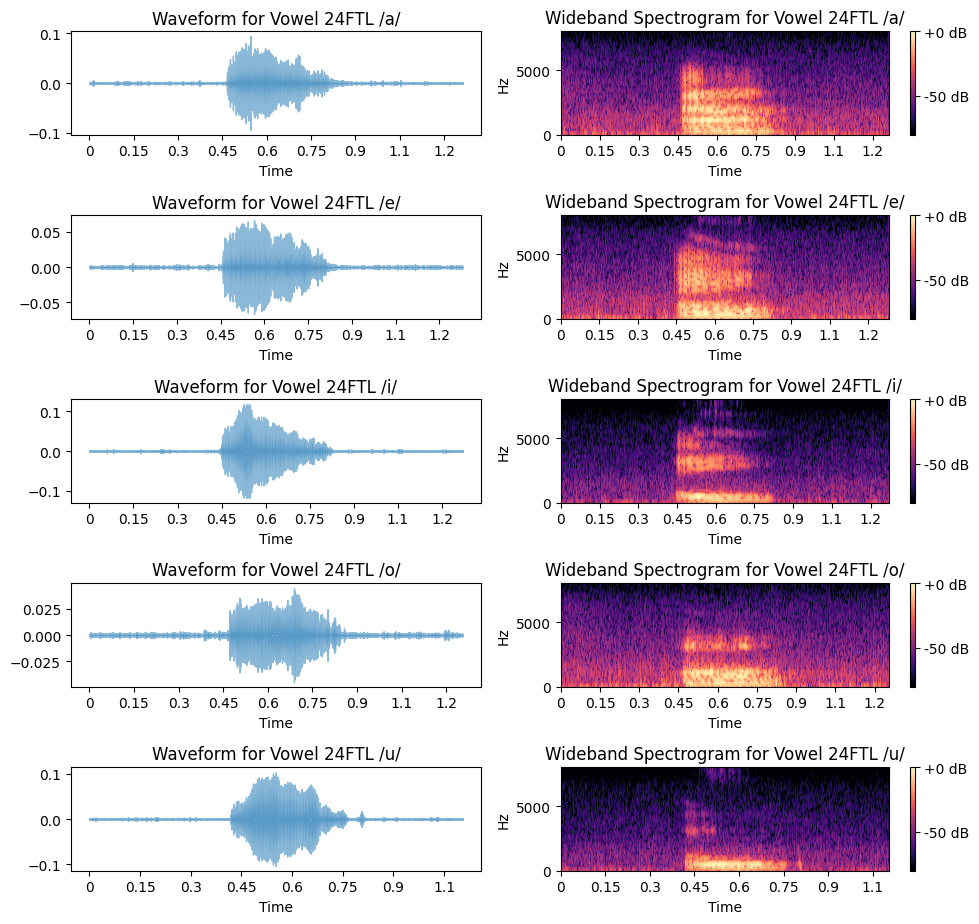

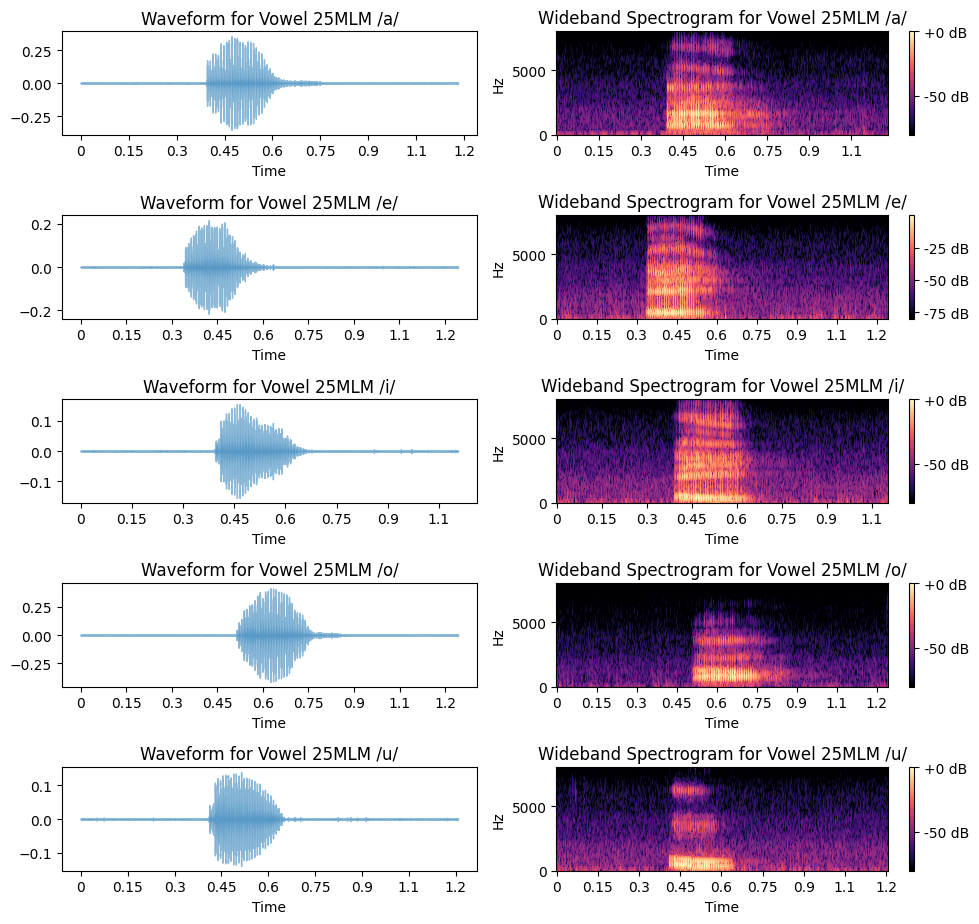

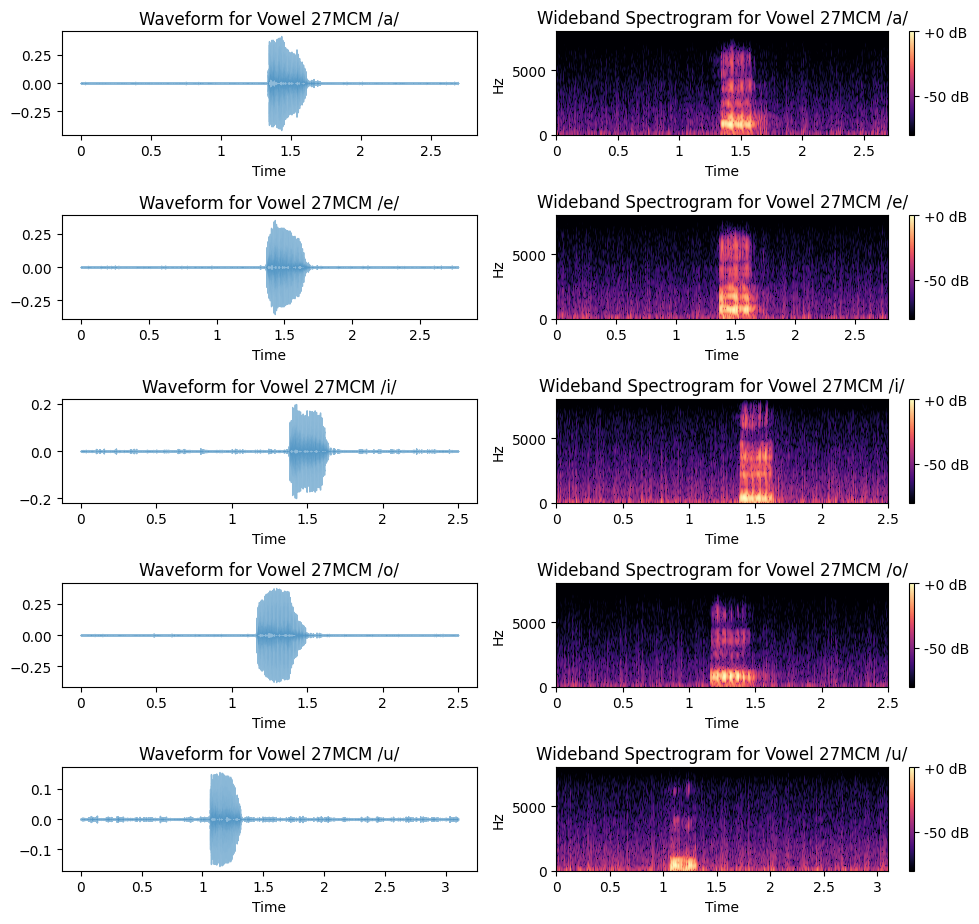

In [39]:
plot_vowel_waves_and_wideband_spectrograms('signals/NguyenAmHuanLuyen-16k/', '23MTL')
plot_vowel_waves_and_wideband_spectrograms('signals/NguyenAmHuanLuyen-16k/', '24FTL')
plot_vowel_waves_and_wideband_spectrograms('signals/NguyenAmHuanLuyen-16k/', '25MLM')
plot_vowel_waves_and_wideband_spectrograms('signals/NguyenAmHuanLuyen-16k/', '27MCM')

### Vowel waves and wideband spectrograms of each vowel

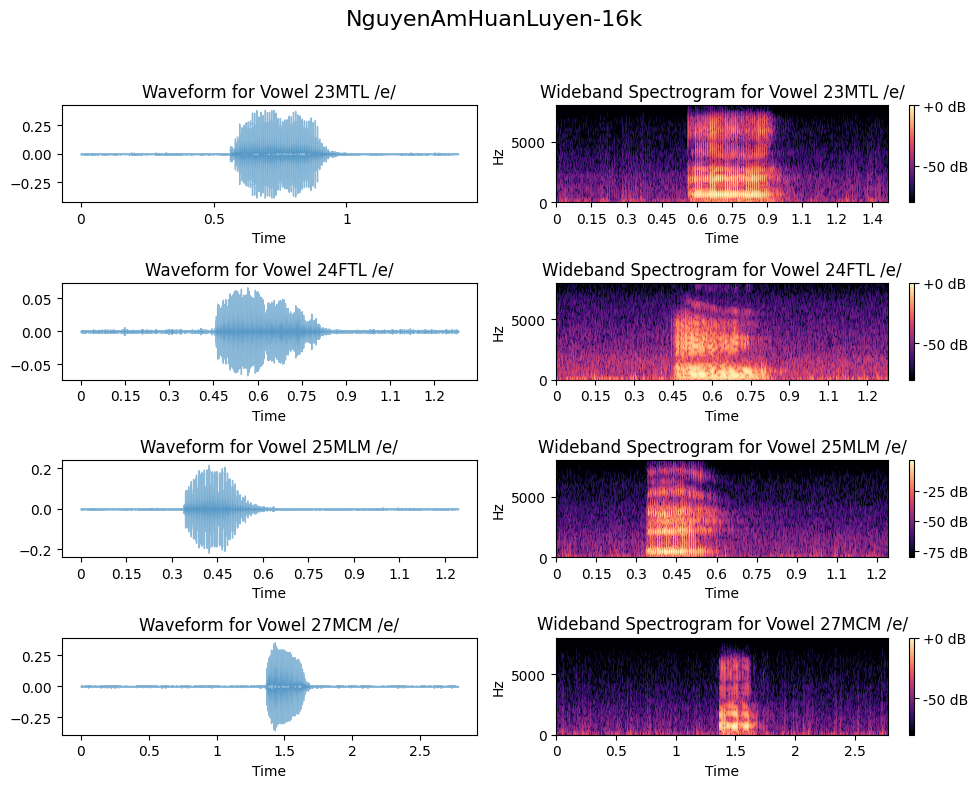

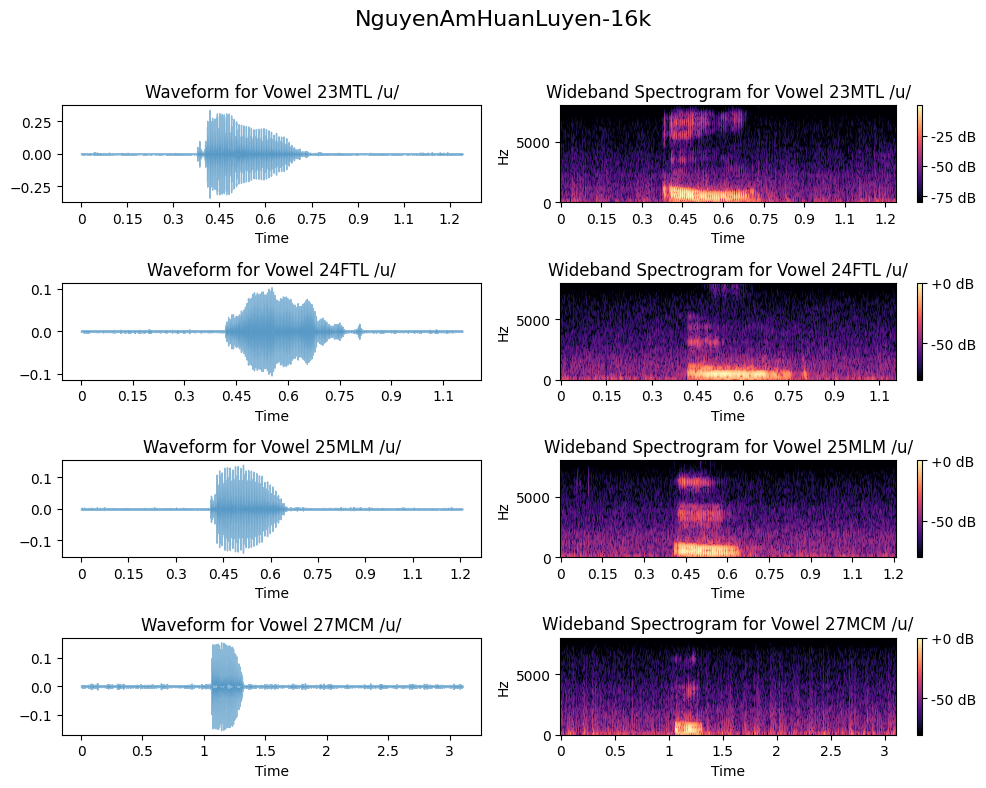

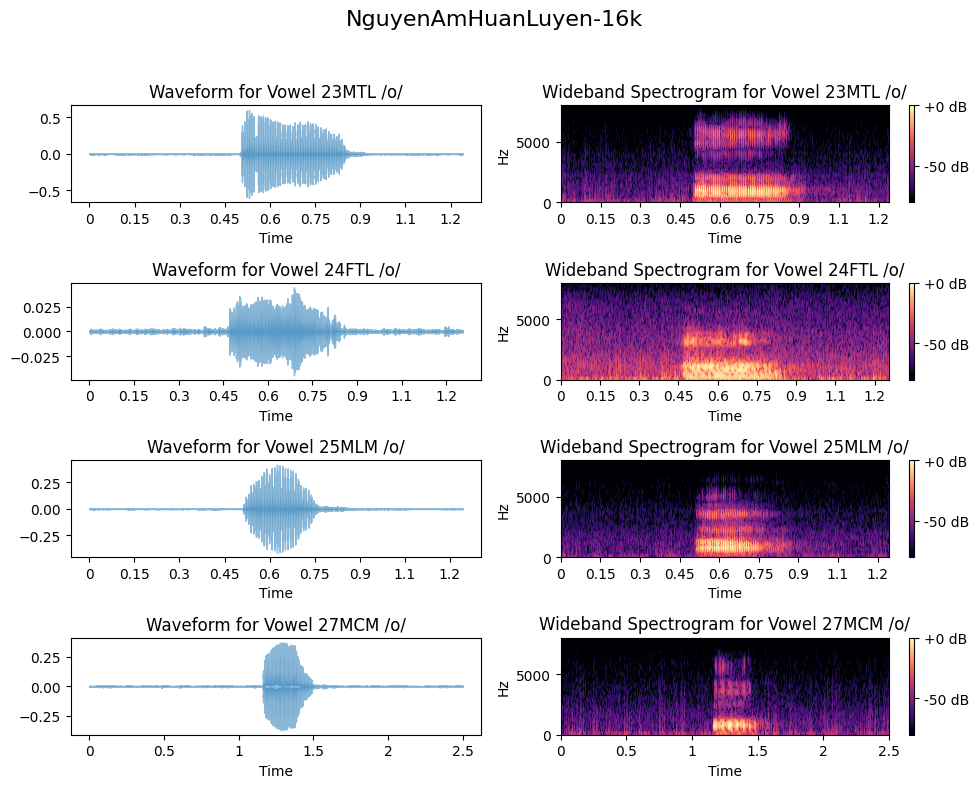

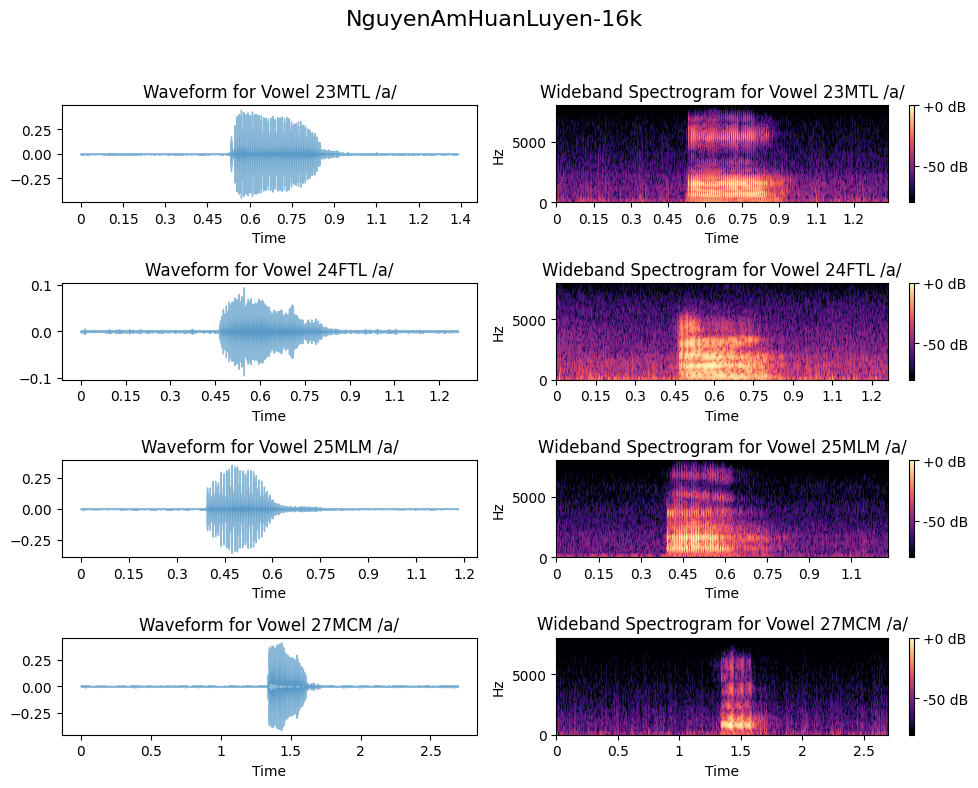

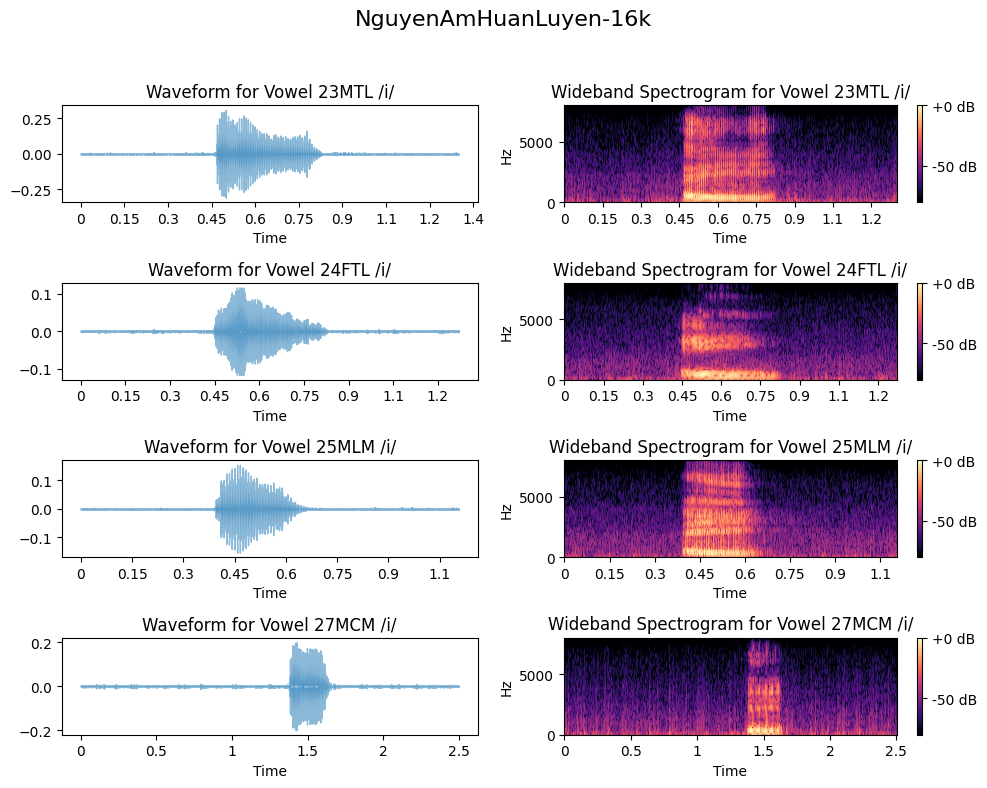

In [40]:
speakers = ['23MTL', '24FTL', '25MLM', '27MCM']

plot_vowel_waves_and_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'e')
plot_vowel_waves_and_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'u')
plot_vowel_waves_and_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'o')
plot_vowel_waves_and_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'a')
plot_vowel_waves_and_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'i')


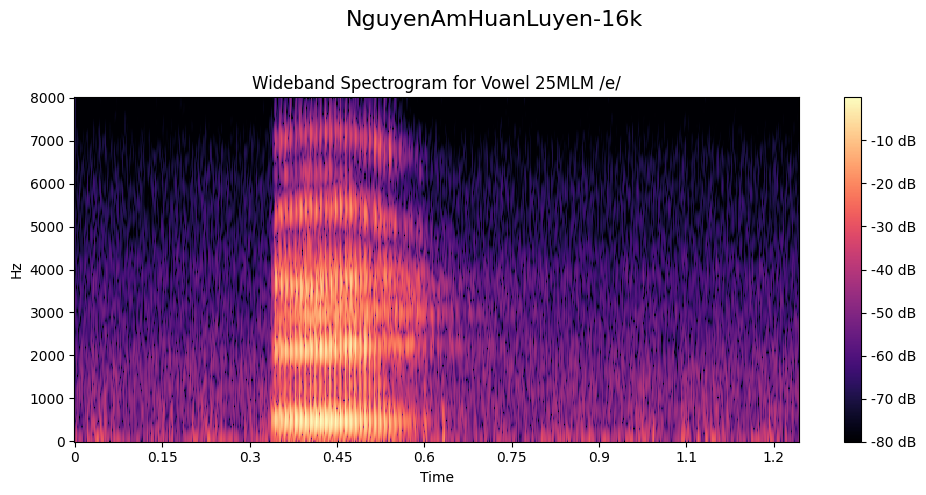

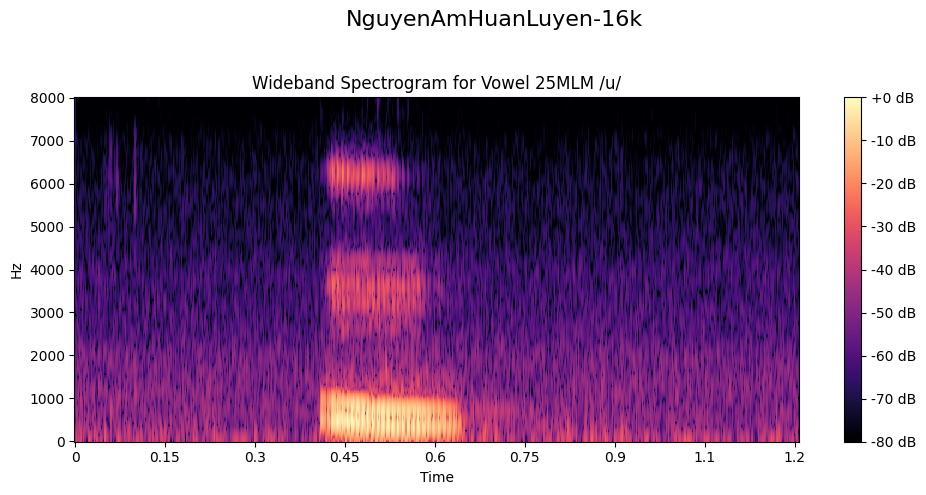

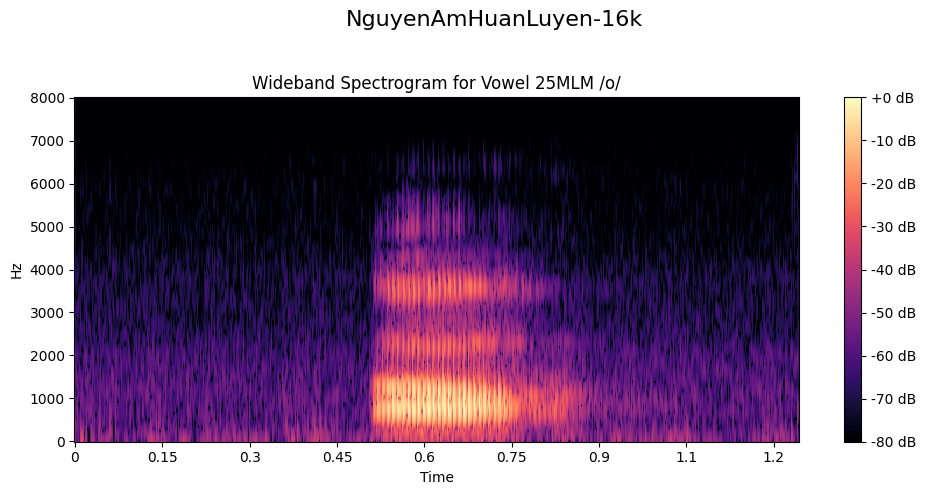

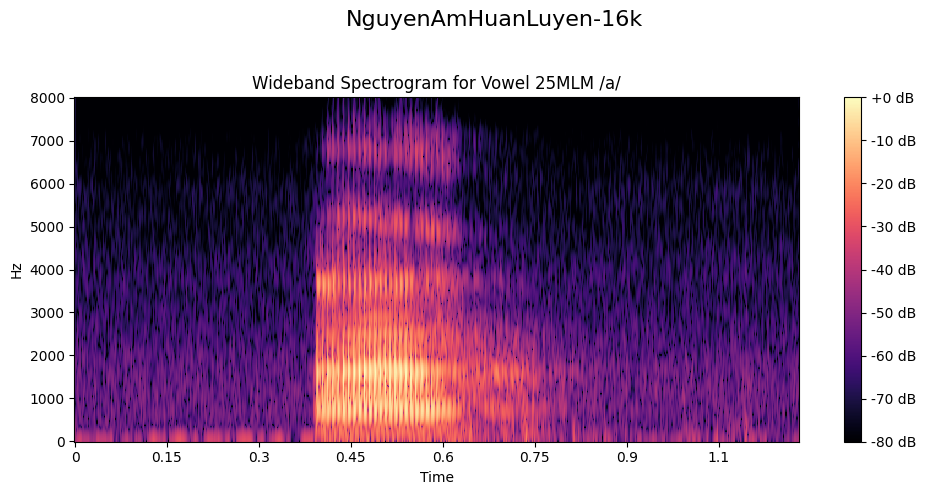

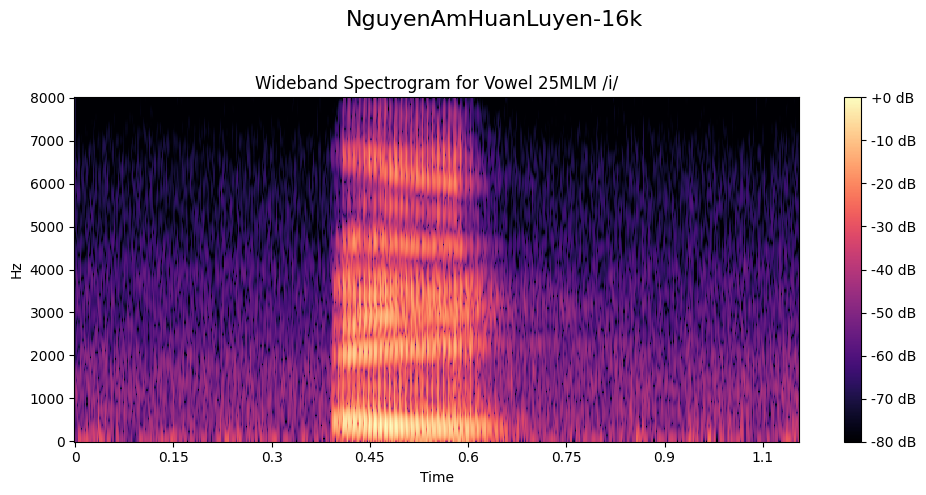

In [41]:
speakers = ['25MLM']

plot_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'e')
plot_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'u')
plot_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'o')
plot_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'a')
plot_wideband_spectrograms_vowel('signals/NguyenAmHuanLuyen-16k', speakers, 'i')

### Chart

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   /a/ - F1  /a/ - F2  /a/ - F3  /e/ - F1  /e/ - F2  /e/ - F3  /i/ - F1  \
0       423       760      2522       340       971      2898       459   
1       809      1569      2613       498      2143      2933       376   
2       744      1572      2579       505      2191      2888       365   
3       778      1556      2584       510      2149      2912       405   

   /i/ - F2  /i/ - F3  /o/ - F1  /o/ - F2  /o/ - F3  /u/ - F1  /u/ - F2  \
0      2068      2776       741      1060      2021       537       863   
1      2155      2918       766      1162      2180       414       745   
2      2184      2958       761      1098      2247       376       722   
3      2132      2900       765      1156      2197       421       774   

   /u/ - F3  
0      2469  
1      3087  
2      3031  
3      3160  
['/a/ - F1', '/a/ - F2', '/a/ - F3', '/e/ - F1', '/e/ - F2', '/e/ - F3', '/i/ - F1', '/i/ - F2', '/i/ - F3', '/o/ - F1', '/o/ - F2', '/o/ - F3', '/u/ - F1', '/u/ - F2', '/u/ - F3

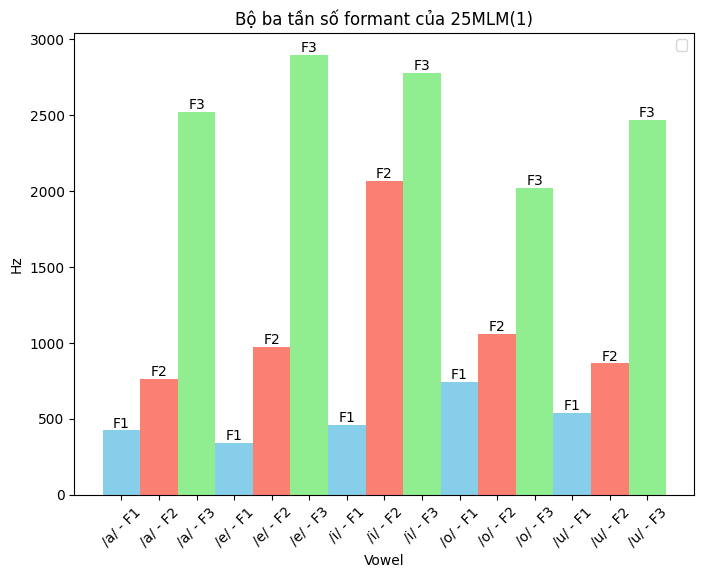

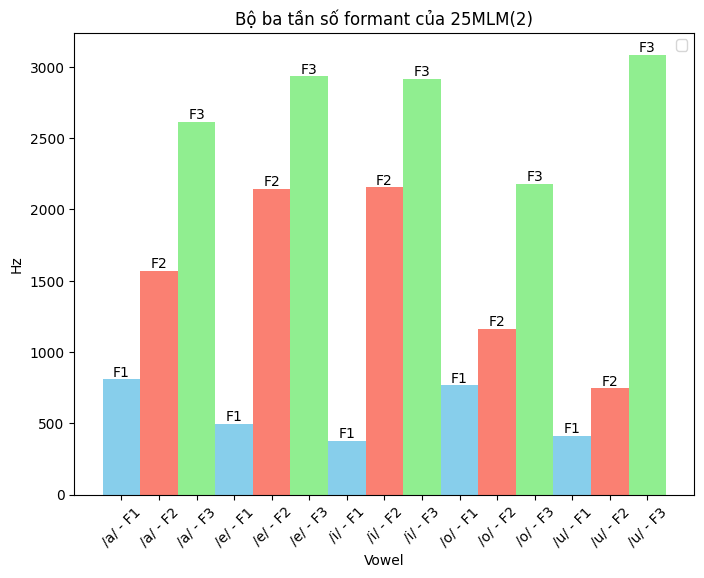

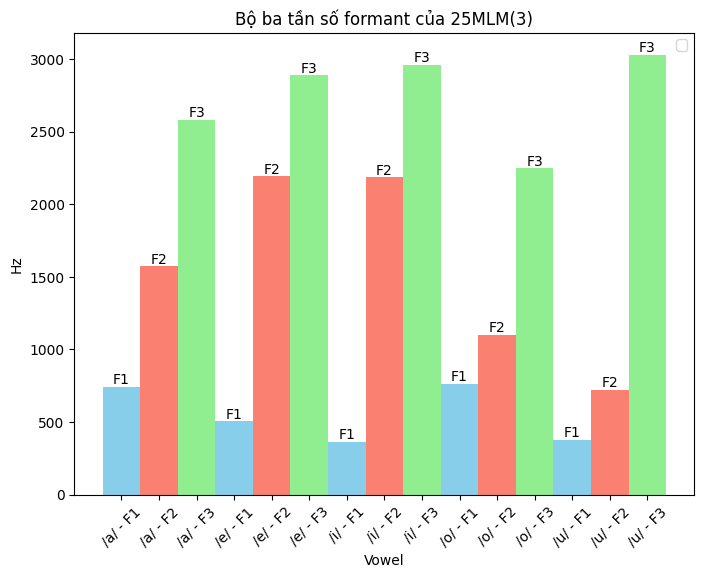

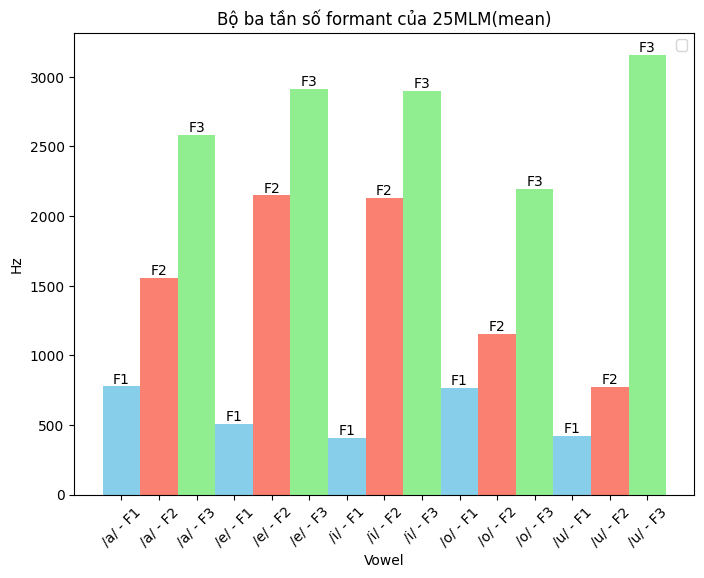

In [42]:
filepath="./25MLM.csv"

plot_chart(filepath)